# Data Parsing & Time Series

## Michael Mallon - UCD

#### This is an anaylsis of Google's performance in the stock market over the past 5 years, 2013-2017

Import the required libraries for later use

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline 
from datetime import datetime
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec
import calendar

# Data Collection

Creating a universal url to use for each pd.read_html

In [2]:
url = 'http://mlg.ucd.ie/modules/COMP30760/stocks/goog.html'

Reading in each individual year rather than the entire 5 years for ease of later use

In [3]:
Google2013 = pd.read_html(url)[0]
Google2014 = pd.read_html(url)[1]
Google2015 = pd.read_html(url)[2]
Google2016 = pd.read_html(url)[3]
Google2017 = pd.read_html(url)[4]

Creating an array of all of the years and using concatenate the tables to create a full table

In [4]:
Years  = [Google2013,Google2014,Google2015,Google2016,Google2017]
Google = pd.concat(Years)
Google.head(7)

,Day,Month,Year,Open,High,Low,Close
0,2,1,2013,357.385559,361.151062,355.959839,359.288177
1,3,1,2013,360.122742,363.600128,358.031342,359.496826
2,4,1,2013,362.313507,368.339294,361.488861,366.600616
3,7,1,2013,365.348755,367.301056,362.929504,365.001007
4,8,1,2013,365.393463,365.771027,359.874359,364.280701
5,9,1,2013,363.769043,366.789398,361.945892,366.675140
6,10,1,2013,369.014923,370.092896,364.380066,368.344269


# Data Parsing & Cleaning

Preparing the columns Day, Month and Year to be changed to a datetime.
Merging the three columns using a '-' to join complying to datetimes syntax and droping the three columns.

In [5]:
Google.Year = Google.Year.astype(str)
Google.Month = Google.Month.astype(str)
Google.Day = Google.Day.astype(str)
Google['Date'] = Google[['Year', 'Month','Day']].apply(lambda x: '-'.join(x), axis=1)
Google.drop(['Year', 'Month','Day'], axis=1, inplace=True)

In [6]:
Google.head(5)

,Open,High,Low,Close,Date
0,357.385559,361.151062,355.959839,359.288177,2013-1-2
1,360.122742,363.600128,358.031342,359.496826,2013-1-3
2,362.313507,368.339294,361.488861,366.600616,2013-1-4
3,365.348755,367.301056,362.929504,365.001007,2013-1-7
4,365.393463,365.771027,359.874359,364.280701,2013-1-8


Changing the new column Date to a time series

In [7]:
Google['Date'] = pd.to_datetime(Google['Date'])
Google.head(5)

,Open,High,Low,Close,Date
0,357.385559,361.151062,355.959839,359.288177,2013-01-02
1,360.122742,363.600128,358.031342,359.496826,2013-01-03
2,362.313507,368.339294,361.488861,366.600616,2013-01-04
3,365.348755,367.301056,362.929504,365.001007,2013-01-07
4,365.393463,365.771027,359.874359,364.280701,2013-01-08


Added a new column day

In [8]:
Google['Day'] = pd.to_datetime(Google['Date'], format='%m/%d/%y').dt.weekday_name

In [9]:
Google.head(5)

,Open,High,Low,Close,Date,Day
0,357.385559,361.151062,355.959839,359.288177,2013-01-02,Wednesday
1,360.122742,363.600128,358.031342,359.496826,2013-01-03,Thursday
2,362.313507,368.339294,361.488861,366.600616,2013-01-04,Friday
3,365.348755,367.301056,362.929504,365.001007,2013-01-07,Monday
4,365.393463,365.771027,359.874359,364.280701,2013-01-08,Tuesday


Need to move day to first column.

In [10]:
cols = Google.columns.tolist()
cols = cols[-2:] + cols[:-2]
Google = Google[cols]

Setting date as the index

In [11]:
Google = Google.set_index('Date')
Google.head(5)

,Day,Open,High,Low,Close
Date,,,,,
2013-01-02,Wednesday,357.385559,361.151062,355.959839,359.288177
2013-01-03,Thursday,360.122742,363.600128,358.031342,359.496826
2013-01-04,Friday,362.313507,368.339294,361.488861,366.600616
2013-01-07,Monday,365.348755,367.301056,362.929504,365.001007
2013-01-08,Tuesday,365.393463,365.771027,359.874359,364.280701


First look at the dataframe, not much can be seen excecpt for what looks to the stock rising at a contant rate

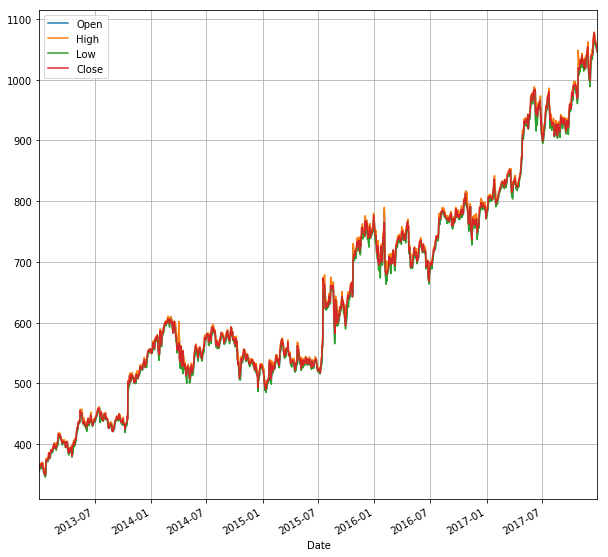

In [12]:
Google.plot(grid = True,figsize=(10,10))

In [13]:
Google.describe()

,Open,High,Low,Close
count,1259.000000,1259.000000,1259.000000,1259.000000
mean,652.704082,657.475653,647.433700,652.657015
std,175.630574,176.627416,174.732814,175.820993
min,350.053253,350.391052,345.512787,349.164032
25%,528.287079,532.615204,524.232483,528.429413
50%,600.002563,603.236511,594.453674,598.005554
75%,774.015015,779.120025,768.662506,772.720002
max,1075.199951,1078.489990,1063.550049,1077.140015


I noticed that the close value of one day does not always equal the same open of the next day so I have created a column adjusted close which contains the correct closing value (adjusted close)

In [14]:
Google.head(3)

,Day,Open,High,Low,Close
Date,,,,,
2013-01-02,Wednesday,357.385559,361.151062,355.959839,359.288177
2013-01-03,Thursday,360.122742,363.600128,358.031342,359.496826
2013-01-04,Friday,362.313507,368.339294,361.488861,366.600616


In [15]:
Google['AdjustedClose'] = Google['Open']
Google.AdjustedClose = Google.AdjustedClose.shift(-1)

Adjusted close now added and works well

In [16]:
Google.head(20)

,Day,Open,High,Low,Close,AdjustedClose
Date,,,,,,
2013-01-02,Wednesday,357.385559,361.151062,355.959839,359.288177,360.122742
2013-01-03,Thursday,360.122742,363.600128,358.031342,359.496826,362.313507
2013-01-04,Friday,362.313507,368.339294,361.488861,366.600616,365.348755
2013-01-07,Monday,365.348755,367.301056,362.929504,365.001007,365.393463
2013-01-08,Tuesday,365.393463,365.771027,359.874359,364.280701,363.769043
2013-01-09,Wednesday,363.769043,366.789398,361.945892,366.675140,369.014923
2013-01-10,Thursday,369.014923,370.092896,364.380066,368.344269,368.602600
2013-01-11,Friday,368.602600,368.816193,365.771027,367.604095,366.118744
2013-01-14,Monday,366.118744,368.701935,358.841095,359.288177,357.340851


# Analysis & Interpretation

### Next task is to be able to visualse and analyse this information at daily, monthly and annual frequencies

Using DataFrame.resample on each indivdual column and concatenate them to one overall table.

###### Daily

In [17]:
OpenD = Google.Open.resample('D').last()
CloseD = Google.AdjustedClose.resample('D').last()
HighD = Google.High.resample('D').max()
LowD = Google.Low.resample('D').min()
Daily = pd.concat([OpenD, CloseD, HighD, LowD], axis=1)
Daily.head(7)

,Open,AdjustedClose,High,Low
Date,,,,
2013-01-02,357.385559,360.122742,361.151062,355.959839
2013-01-03,360.122742,362.313507,363.600128,358.031342
2013-01-04,362.313507,365.348755,368.339294,361.488861
2013-01-05,NaN,NaN,NaN,NaN
2013-01-06,NaN,NaN,NaN,NaN
2013-01-07,365.348755,365.393463,367.301056,362.929504
2013-01-08,365.393463,363.769043,365.771027,359.874359


I have noticed that there is no values entered in for the weekends (stock markets are closed). This will cause gaps when visualsing. Best resolve I feel is to fill these with each fridays information using ffill().

In [18]:
OpenD = Google.Open.resample('D').last().ffill()
CloseD = Google.AdjustedClose.resample('D').last().ffill()
HighD = Google.High.resample('D').max().ffill()
LowD = Google.Low.resample('D').min().ffill()
Daily = pd.concat([OpenD, CloseD, HighD, LowD], axis=1)
Daily.head(7)

,Open,AdjustedClose,High,Low
Date,,,,
2013-01-02,357.385559,360.122742,361.151062,355.959839
2013-01-03,360.122742,362.313507,363.600128,358.031342
2013-01-04,362.313507,365.348755,368.339294,361.488861
2013-01-05,362.313507,365.348755,368.339294,361.488861
2013-01-06,362.313507,365.348755,368.339294,361.488861
2013-01-07,365.348755,365.393463,367.301056,362.929504
2013-01-08,365.393463,363.769043,365.771027,359.874359


Using subplots as its hard to distinguish between each line otherwise.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1533a208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a15248be0>]], dtype=object)

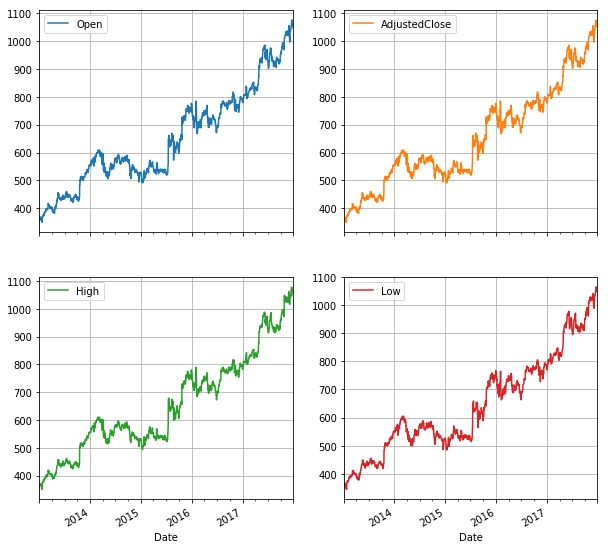

In [19]:
Daily.plot(subplots=True,grid = True,figsize=(10,10),layout=(2,2))

###### Monthly

Using resample to get only months.

In [20]:
OpenM = Google.Open.resample('M').first()
CloseM = Google.AdjustedClose.resample('M').last()
HighM = Google.High.resample('M').max()
LowM = Google.Low.resample('M').min()
Monthly = pd.concat([OpenM, CloseM, HighM, LowM], axis=1)
Monthly.head(7)

,Open,AdjustedClose,High,Low
Date,,,,
2013-01-31,357.385559,376.650238,378.016357,345.512787
2013-02-28,376.650238,396.322296,401.871216,376.600586
2013-03-31,396.322296,394.936310,419.273041,394.086853
2013-04-30,394.936310,408.970032,411.145905,378.170380
2013-05-31,408.970032,433.679321,457.325531,405.542328
2013-06-30,433.679321,440.360870,452.477081,420.872620
2013-07-31,440.360870,444.608246,461.001617,434.975891


Much easier to read now overall performance can be clearly seen.
It seems Googles stock prices have almost trebled in the last 5 years.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1da95f60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1dcf9320>]], dtype=object)

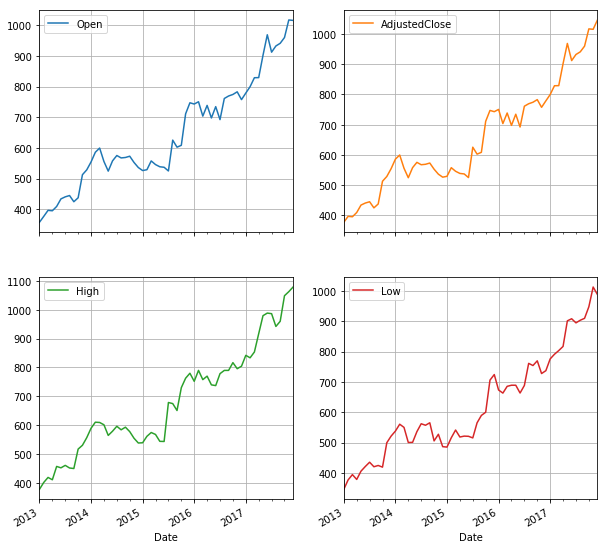

In [21]:
Monthly.plot(subplots=True,grid = True,figsize=(10,10),layout=(2,2))

###### Annual

Once again using resample to get Annual reports

In [22]:
OpenA = Google.Open.resample('A').first()
CloseA = Google.AdjustedClose.resample('A').last()
HighA = Google.High.resample('A').max()
LowA = Google.Low.resample('A').min()
Annual = pd.concat([OpenA, CloseA, HighA, LowA], axis=1)
Annual.head(5)


,Open,AdjustedClose,High,Low
Date,,,,
2013-12-31,357.385559,554.125916,556.878052,345.512787
2014-12-31,554.125916,526.114746,610.469482,486.325928
2015-12-31,526.114746,743.000000,779.979980,484.891632
2016-12-31,743.000000,778.809998,816.679993,663.059998
2017-12-31,778.809998,1046.719971,1078.489990,775.799988


No need to use subplots as results more definitive. I feel this is the best represtation of the Companys performance over the past 5 years, the information is much clearer and easier to read.

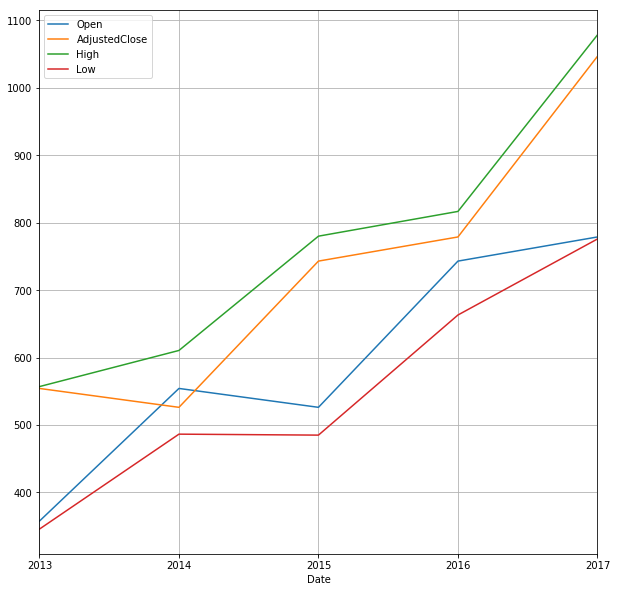

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
Annual.plot(ax=ax,grid = True)

## Further Anaylsis

What is the best day of trade over the past 5 years?
To do this I am going to find the sum of the open for everyday and compare them 

In [24]:
Monday = Google[Google.Day.str.contains("Monday") == True]
Tuesday = Google[Google.Day.str.contains("Tuesday") == True]
Wednesday = Google[Google.Day.str.contains("Wednesday") == True]
Thursday = Google[Google.Day.str.contains("Thursday") == True]
Friday = Google[Google.Day.str.contains("Friday") == True]

Monday    = Monday['Open'].sum()
Tuesday   = Tuesday['Open'].sum()
Wednesday = Wednesday['Open'].sum()
Thursday  = Thursday['Open'].sum()
Friday    = Friday['Open'].sum()

columns =  ['Day Total']
Week = pd.DataFrame(columns=columns)
Week.loc[1] = [Monday]
Week.loc[2] = [Tuesday]
Week.loc[3] = [Wednesday]
Week.loc[4] = [Thursday]
Week.loc[5] = [Friday]

Monday seems to be a non day for trading with Friday and Thursday following. Tuesday and Wednesday seem to be the main days of trade. Changes in open

Two reasons for Monday being the worst day for trading are:
1. Monday is the first trading day after two whole days of the stock market being closed.Inturn there is a lot of time for news to come out which can affect a companys stock price.
2. A bad trading day could be because of the psychological effect Mondays have on people making the more negative and not risking trades.

Text(0.5,1,'Best Days Of Trade - GOOG')

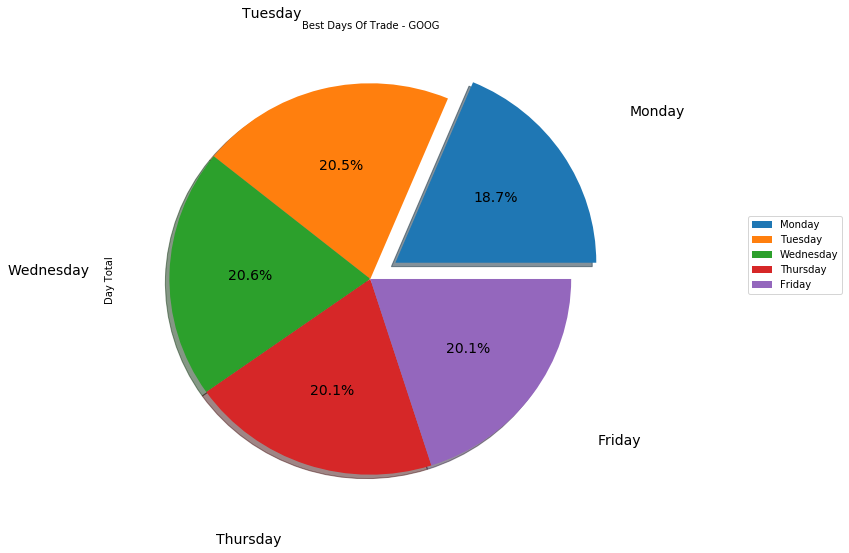

In [25]:
explode = (0.15, 0, 0, 0,0)
labels = ["Monday","Tuesday","Wednesday","Thursday","Friday"]
Week.plot(subplots=True,kind='pie',figsize=(9,9),fontsize=14,explode=explode,autopct='%1.1f%%',shadow=True,labels=labels,labeldistance=1.4)
plt.legend(loc='right', bbox_to_anchor=(1.45, .55))
plt.title('Best Days Of Trade - GOOG',fontsize=10)

## Stock Return

One way of analysising a stock is by seeing its stock return which is how it performs over time in a set period. To calculate this I will be using the start of a period as 1 and when the stock return fulctuates above or below this figure I will have a good idea on how it is performing.

In [26]:
DailyReturn = Daily.drop(Daily.columns[[0,2,3]], axis=1)
MonthlyReturn = Monthly.drop(Daily.columns[[0,2,3]], axis=1)
AnnualReturn = Annual.drop(Daily.columns[[0,2,3]], axis =1)
DailyReturn.head(5)

,AdjustedClose
Date,
2013-01-02,360.122742
2013-01-03,362.313507
2013-01-04,365.348755
2013-01-05,365.348755
2013-01-06,365.348755


Seperating each year

In [27]:
DailyReturn2017 = DailyReturn['2017']
MonthlyReturn2017 = MonthlyReturn['2017']

DailyReturn2016 = DailyReturn['2016']
MonthlyReturn2016 = MonthlyReturn['2016']

DailyReturn2015 = DailyReturn['2015']
MonthlyReturn2015 = MonthlyReturn['2015']

DailyReturn2014 = DailyReturn['2014']
MonthlyReturn2014 = MonthlyReturn['2014']

DailyReturn2013 = DailyReturn['2013']
MonthlyReturn2013 = MonthlyReturn['2013']

Calculating stock return for every year

In [28]:
Daily_Return2017 = DailyReturn2017.apply(lambda x: x / x[0])
Monthly_Return2017 = MonthlyReturn2017.apply(lambda x: x / x[0])

Daily_Return2016 = DailyReturn2016.apply(lambda x: x / x[0])
Monthly_Return2016 = MonthlyReturn2016.apply(lambda x: x / x[0])

Daily_Return2015 = DailyReturn2015.apply(lambda x: x / x[0])
Monthly_Return2015 = MonthlyReturn2015.apply(lambda x: x / x[0])

Daily_Return2014 = DailyReturn2014.apply(lambda x: x / x[0])
Monthly_Return2014 = MonthlyReturn2014.apply(lambda x: x / x[0])

Daily_Return2013 = DailyReturn2013.apply(lambda x: x / x[0])
Monthly_Return2013 = MonthlyReturn2013.apply(lambda x: x / x[0])

Annual_Return = AnnualReturn.apply(lambda x:x /x[0])
Daily_Return = DailyReturn.apply(lambda x:x /x[0])
Monthly_Return = MonthlyReturn.apply(lambda x:x / x[0])

First tried plot using time series dataframes but it doesn't look great

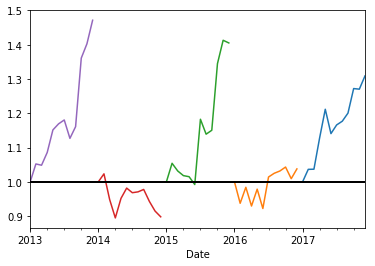

In [29]:
fig, ax = plt.subplots()

Monthly_Return2017.plot(ax=ax,label='2017',legend=False)
Monthly_Return2016.plot(ax=ax,label='2016',legend=False)
Monthly_Return2015.plot(ax=ax,label='2015',legend=False)
Monthly_Return2014.plot(ax=ax,label='2014',legend=False)
Monthly_Return2013.plot(ax=ax,label='2013',legend=False).axhline(y = 1, color = "black", lw = 2)

Resetting the index of every year and plotting them against each other giving a better representation

In [30]:
Daily_Return2017 = Daily_Return2017.reset_index()
Daily_Return2016 = Daily_Return2016.reset_index()
Daily_Return2015 = Daily_Return2015.reset_index()
Daily_Return2014 = Daily_Return2014.reset_index()
Daily_Return2013 = Daily_Return2013.reset_index()

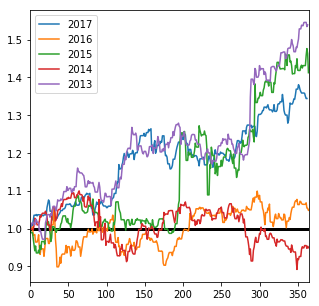

In [31]:
fig, ax = plt.subplots(figsize=(5,5))

Daily_Return2017['AdjustedClose'].plot(ax=ax,label='2017').axhline(y = 1, color = "black", lw = 3)
Daily_Return2016['AdjustedClose'].plot(ax=ax,label='2016')
Daily_Return2015['AdjustedClose'].plot(ax=ax,label='2015')
Daily_Return2014['AdjustedClose'].plot(ax=ax,label='2014')
Daily_Return2013['AdjustedClose'].plot(ax=ax,label='2013')
plt.legend()

Daily looks too hard to draw information from so I will use Monthly

In [32]:
Monthly_Return2017 = Monthly_Return2017.reset_index()
Monthly_Return2016 = Monthly_Return2016.reset_index()
Monthly_Return2015 = Monthly_Return2015.reset_index()
Monthly_Return2014 = Monthly_Return2014.reset_index()
Monthly_Return2013 = Monthly_Return2013.reset_index()

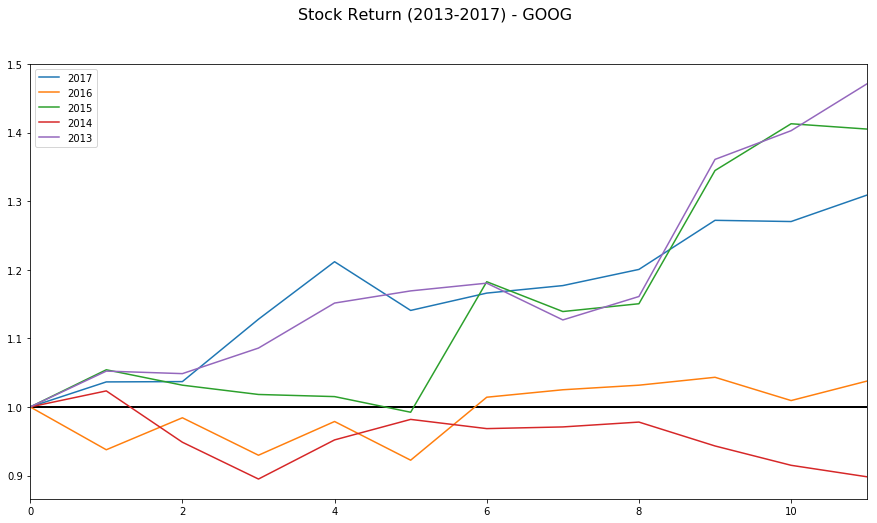

In [33]:
fig, ax = plt.subplots(figsize=(15,8))
fig.suptitle("Stock Return (2013-2017) - GOOG", fontsize=16)

Monthly_Return2017['AdjustedClose'].plot(ax=ax,label='2017').axhline(y = 1, color = "black", lw = 2)
Monthly_Return2016['AdjustedClose'].plot(ax=ax,label='2016')
Monthly_Return2015['AdjustedClose'].plot(ax=ax,label='2015')
Monthly_Return2014['AdjustedClose'].plot(ax=ax,label='2014')
Monthly_Return2013['AdjustedClose'].plot(ax=ax,label='2013')
plt.legend()

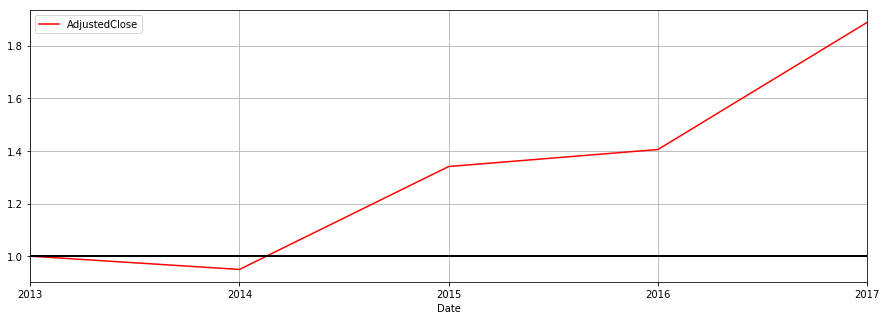

In [34]:
Annual_Return.plot(grid = True,color='red',figsize=(15,5)).axhline(y = 1, color = "black", lw = 2)

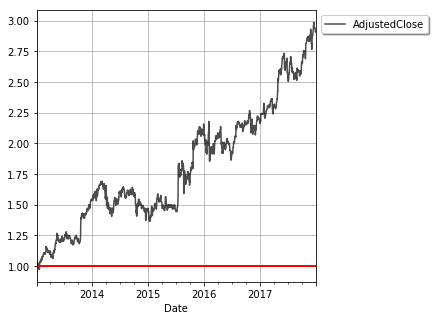

In [35]:
Daily_Return.plot(grid = True,color='black',figsize=(5,5),alpha=0.7).axhline(y = 1, color = "red", lw = 2)
plt.legend(bbox_to_anchor=(1, 1), shadow=True)

In [36]:
Google.head(7)

,Day,Open,High,Low,Close,AdjustedClose
Date,,,,,,
2013-01-02,Wednesday,357.385559,361.151062,355.959839,359.288177,360.122742
2013-01-03,Thursday,360.122742,363.600128,358.031342,359.496826,362.313507
2013-01-04,Friday,362.313507,368.339294,361.488861,366.600616,365.348755
2013-01-07,Monday,365.348755,367.301056,362.929504,365.001007,365.393463
2013-01-08,Tuesday,365.393463,365.771027,359.874359,364.280701,363.769043
2013-01-09,Wednesday,363.769043,366.789398,361.945892,366.675140,369.014923
2013-01-10,Thursday,369.014923,370.092896,364.380066,368.344269,368.602600


## Growth, Return and Range

The first step I believe nesseary to get more in depth answers is to create a column Growth % which will show how much the stock of a company has grown or srunk in that time period. I found two ways to calculate this one using returns and the other comparing closes.


In [37]:
Google['Growth'] = np.where(Google['Open'] < 0, Google['Open'], (((Google['AdjustedClose']-Google['AdjustedClose'].shift(1))/Google['AdjustedClose'])*100))

In [38]:
Google['Return Change'] = Daily_Return.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
Google.head(5)

,Day,Open,High,Low,Close,AdjustedClose,Growth,Return Change
Date,,,,,,,,
2013-01-02,Wednesday,357.385559,361.151062,355.959839,359.288177,360.122742,NaN,NaN
2013-01-03,Thursday,360.122742,363.600128,358.031342,359.496826,362.313507,0.604660,0.006065
2013-01-04,Friday,362.313507,368.339294,361.488861,366.600616,365.348755,0.830781,0.008343
2013-01-07,Monday,365.348755,367.301056,362.929504,365.001007,365.393463,0.012236,0.000122
2013-01-08,Tuesday,365.393463,365.771027,359.874359,364.280701,363.769043,-0.446553,-0.004456


Dropping all rows with null values incase it skews results.

In [39]:
Google = Google.dropna()
Google.head(5)

,Day,Open,High,Low,Close,AdjustedClose,Growth,Return Change
Date,,,,,,,,
2013-01-03,Thursday,360.122742,363.600128,358.031342,359.496826,362.313507,0.604660,0.006065
2013-01-04,Friday,362.313507,368.339294,361.488861,366.600616,365.348755,0.830781,0.008343
2013-01-07,Monday,365.348755,367.301056,362.929504,365.001007,365.393463,0.012236,0.000122
2013-01-08,Tuesday,365.393463,365.771027,359.874359,364.280701,363.769043,-0.446553,-0.004456
2013-01-09,Wednesday,363.769043,366.789398,361.945892,366.675140,369.014923,1.421590,0.014318


Ordering the growth percentage by desceding showing the biggest days first

In [40]:
GoogleSpikes = Google.sort_values(['Growth'], ascending=False)

This shows Alphabets best days on the stock market in the last 5 years

In [41]:
GoogleSpikes.head(7)

,Day,Open,High,Low,Close,AdjustedClose,Growth,Return Change
Date,,,,,,,,
2015-07-16,Thursday,565.119995,580.679993,565.000000,579.849976,649.000000,12.924500,0.138395
2015-10-22,Thursday,646.700012,657.799988,644.010010,651.789978,727.500000,11.106528,0.117731
2013-10-17,Thursday,443.609741,445.552124,440.003204,441.523315,485.134674,8.559465,0.089481
2014-04-01,Tuesday,555.654724,565.341431,555.654724,564.058533,596.708984,6.880114,0.071282
2015-08-24,Monday,573.000000,599.330017,565.049988,589.609985,614.909973,6.815627,0.070590
2015-08-26,Wednesday,610.349976,631.710022,599.049988,628.619995,639.400024,4.543329,0.046498
2015-08-10,Monday,639.479980,643.440002,631.249023,633.729980,669.200012,4.441128,0.045428



Looking into Googles best day of trade in the last 5 years '2015-07-16' some very interesting information can be found.
On the website 'http://money.cnn.com/2015/07/16/technology/google-earnings-q2/index.html' there is an artical written about how Googles stock rised astronomically after Google announched its second quarter earnings and sales.This rise seemed to be attributed to the more people were using their phones had doubled and Google was profiting form ads.

This shows Alphabets worst days on the stock market in the last 5 years

In [42]:
GoogleSpikes.tail(7)

,Day,Open,High,Low,Close,AdjustedClose,Growth,Return Change
Date,,,,,,,,
2017-06-09,Friday,984.500000,984.500000,935.630005,949.830017,939.559998,-4.783090,-0.046722
2014-04-02,Wednesday,596.708984,601.522522,559.115662,563.899353,566.733765,-5.289118,-0.051540
2016-02-05,Friday,703.869995,703.989990,680.150024,683.570007,667.849976,-5.393430,-0.052530
2014-04-10,Thursday,561.910339,561.910339,536.947571,537.991821,529.637756,-6.093331,-0.059149
2014-04-04,Friday,571.507568,574.610474,540.030640,540.169861,537.782959,-6.271045,-0.060823
2016-02-03,Wednesday,770.219971,774.500000,720.500000,726.950012,722.809998,-6.559120,-0.063530
2015-08-21,Friday,639.780029,640.049988,612.330017,612.479980,573.000000,-11.654455,-0.110239


Looking into Googles worst day of trade in the last 5 years the two dates '2015-08-21' and '2013-04-19' some very interesting information can be found.

_'2015-08-21'_-  It seems there are two reasons for this huge drop in stock price. One was that only a month before Googles stock had increased around 11% and two the stock markets in general took a huge around this period according to the artical at 'https://www.nytimes.com/2015/08/22/business/dealbook/global-markets-fall-for-second-day.html'

_'2013-04-19'_-  On the website 'http://money.cnn.com/2014/04/16/technology/google-earnings/index.html' there is an artical written about how Googles stock dropped dangeriously after Google announched its first quarter earnings and sales and it didn't hit its projected target.

Another column I feel could be usefull is range which will be able to tell the difference in the open and close for each time period.

In [43]:
Google['Range'] = np.where(Google['Open'] < 0, Google['Open'], (Google['Close']-Google['Open']))

Ordering the range by desceding showing the biggest days first

In [44]:
GoogleRange = Google.sort_values(['Range'], ascending=False)

This shows when Alphabets stocks fluctuated the most positively in the stock market in the last 5 years

In [45]:
GoogleRange.head(7)

,Day,Open,High,Low,Close,AdjustedClose,Growth,Return Change,Range
Date,,,,,,,,,
2015-07-17,Friday,649.000000,674.468018,645.000000,672.929993,659.239990,1.553302,0.015655,23.929993
2015-12-01,Tuesday,747.109985,768.950012,746.700012,767.039978,768.900024,2.833924,0.028749,19.929993
2015-10-02,Friday,607.200012,627.340027,603.130005,626.909973,632.000000,3.924049,0.040031,19.709961
2015-01-30,Friday,513.036743,536.915344,512.698608,531.594604,528.819885,2.984597,0.030300,18.557861
2015-08-26,Wednesday,610.349976,631.710022,599.049988,628.619995,639.400024,4.543329,0.046498,18.270019
2013-10-18,Friday,485.134674,504.449036,483.852997,502.437134,502.461975,3.448480,0.035093,17.302460
2017-12-06,Wednesday,1001.500000,1024.969971,1001.140015,1018.380005,1020.429993,1.855100,0.018725,16.880005


This shows when Alphabets stocks fluctuated the most negatively in the stock market in the last 5 years

In [46]:
GoogleRange.tail(7)

,Day,Open,High,Low,Close,AdjustedClose,Growth,Return Change,Range
Date,,,,,,,,,
2016-11-10,Thursday,791.169983,791.169983,752.179993,762.559998,756.539978,-4.577419,-0.044757,-28.609985
2016-01-13,Wednesday,730.849976,734.739990,698.609985,700.559998,705.380005,-3.610816,-0.035472,-30.289978
2014-04-04,Friday,571.507568,574.610474,540.030640,540.169861,537.782959,-6.271045,-0.060823,-31.337707
2014-04-02,Wednesday,596.708984,601.522522,559.115662,563.899353,566.733765,-5.289118,-0.051540,-32.809631
2015-08-25,Tuesday,614.909973,617.450012,581.109985,582.059998,610.349976,-0.747112,-0.007443,-32.849975
2017-06-09,Friday,984.500000,984.500000,935.630005,949.830017,939.559998,-4.783090,-0.046722,-34.669983
2016-02-03,Wednesday,770.219971,774.500000,720.500000,726.950012,722.809998,-6.559120,-0.063530,-43.269959


Using this line of best fit graph you can see how as the growth figure gets bigger/smaller so does the range. Using this you could predict the range when you have the growth and visa versa.

When the growth exceeds +-5 its much harder to predict the other as these growths don't happen as often.

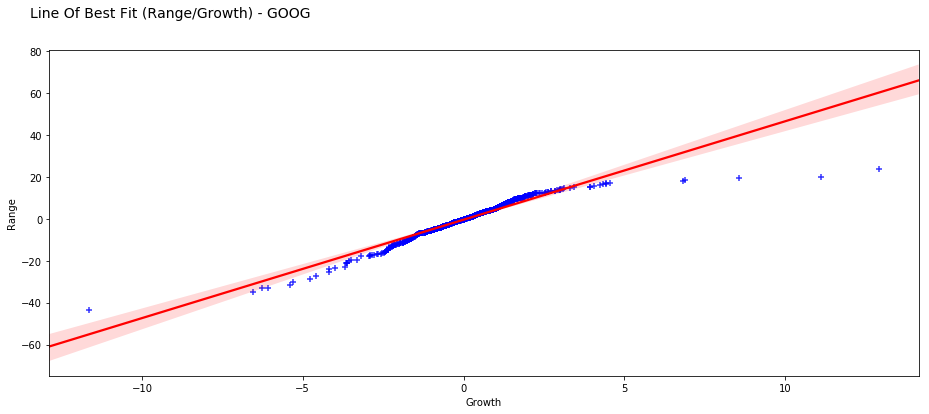

In [47]:
fig = plt.figure(figsize=(26, 6))
fig.suptitle("Line Of Best Fit (Range/Growth) - GOOG", fontsize=14)
gs = gridspec.GridSpec(100,100)
ax = fig.add_subplot(gs[:,40:130])
sns.regplot(GoogleSpikes['Growth'],GoogleRange['Range'],marker="+",scatter_kws={"color": "blue"}, line_kws={"color":"red"})

Below I have graphed Googles Highest and Worst ever growth which all happened in the same period of two months. As the companys stocks increased so much in July when its growth reversed it actually was not that bad of an impact as it had already grown so much.

A great rise can be seen after Googles worst growth this shows the companys stability in the stock market.

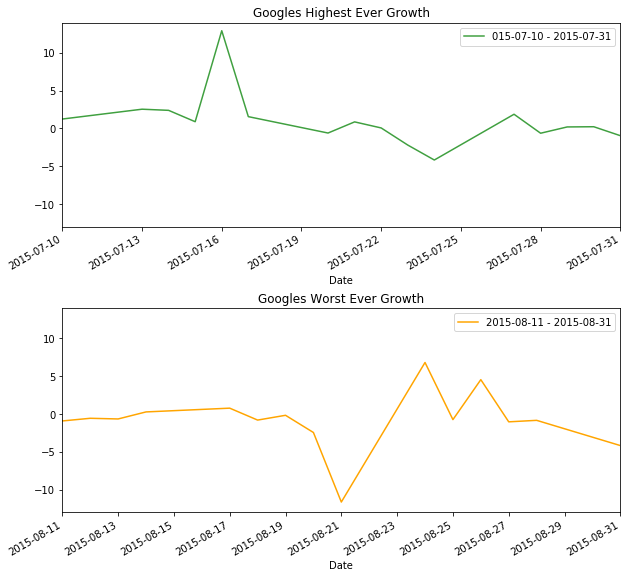

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
GoogleSpikes.plot(ax=axes[0],y='Growth',subplots=False,figsize=(10,10),color='green',label='015-07-10 - 2015-07-31',alpha=.75); axes[0].set_title('Googles Highest Ever Growth')
axes[0].set_xlim('2015-07-10', '2015-07-31')
axes[0].set_ylim(-13, 14)
GoogleSpikes.plot(ax=axes[1],y='Growth',subplots=False,figsize=(10,10),color='orange',label='2015-08-11 - 2015-08-31',alpha=1); axes[1].set_title('Googles Worst Ever Growth')
axes[1].set_xlim('2015-08-11', '2015-08-31')
axes[1].set_ylim(-13, 14)
plt.legend(loc='best')

Looking from a further out perspective like below this increase and decrease was still a huge raise in Googles stock prices.

(500, 700)

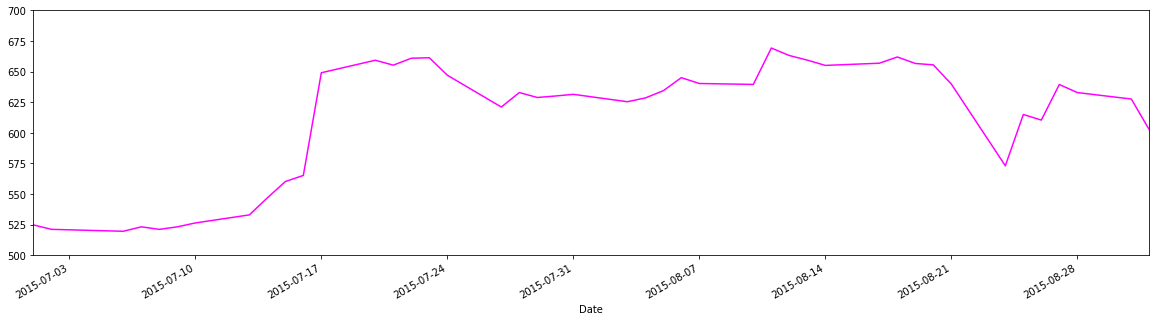

In [49]:
fig, ax = plt.subplots(figsize=(20, 5))
Google['Open'].plot(ax=ax,label='2015',color='magenta')
ax.set_xlim('2015-07', '2015-09')
ax.set_ylim(500, 700)

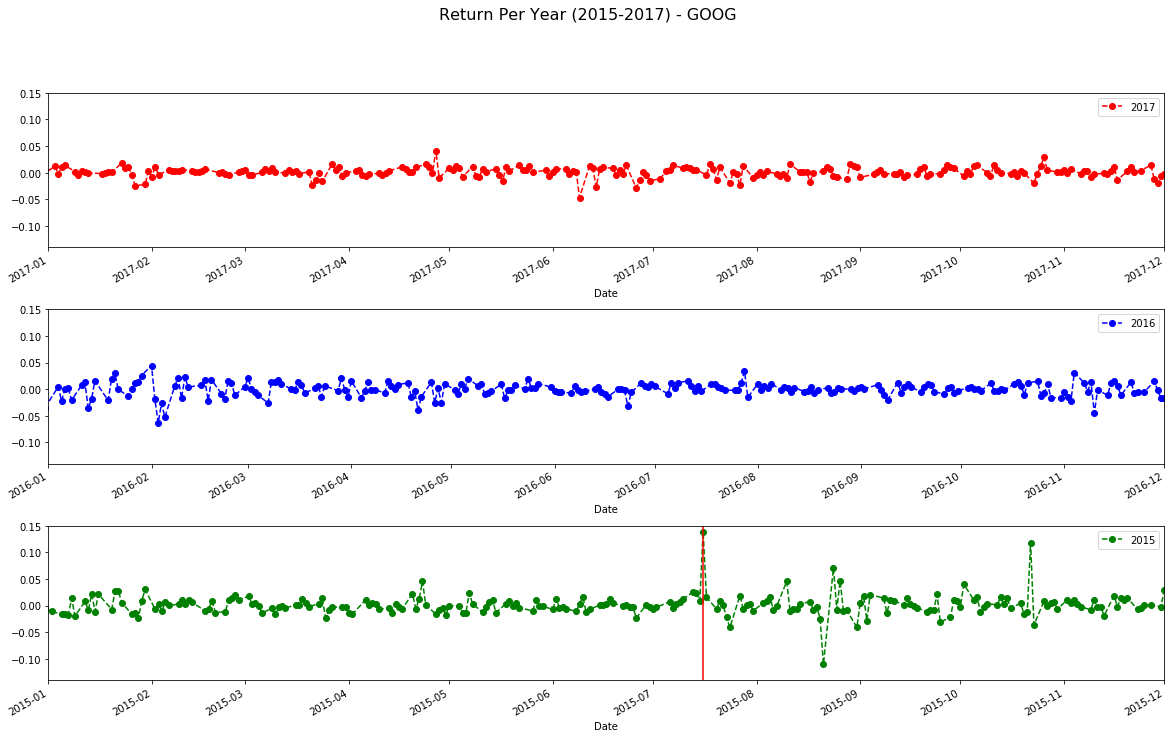

In [50]:
fig, axes = plt.subplots(nrows=3, ncols=1)
fig.suptitle("Return Per Year (2015-2017) - GOOG", fontsize=16)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

Google.plot(ax=axes[0],y= 'Return Change',figsize=(20,10), color='red',legend=True, linestyle='--', marker='o',label='2017')
axes[0].set_xlim('2017-01','2017-12')
axes[0].set_ylim(-.14, 0.15)

Google.plot(ax=axes[1],y= 'Return Change',figsize=(20,10), color='blue',legend=True, linestyle='--', marker='o',label='2016')
axes[1].set_xlim('2016-01','2016-12')
axes[1].set_ylim(-.14, 0.15)

Google.plot(ax=axes[2],y= 'Return Change',figsize=(20,12), color='green',legend=True, linestyle='--', marker='o',label='2015')
axes[2].set_xlim('2015-01','2015-12')
axes[2].set_ylim(-.14, 0.15)

plt.axvline(x=['2015-7-16'],color='red',label='High Point')

In the graph above its very clear that both the end and the start of the year seem to be a more unstable time at Google with its returns fluctuating up and down.The closer the value is to 0 the more stable it is. In the final graph the highest point of return is shown towering over the others.

#### Seperating all the years for analysis now all the columns I wish to add now included

In [51]:
Google2013 = Google['2013']
Google2014 = Google['2014']
Google2015 = Google['2015']
Google2016 = Google['2016']
Google2017 = Google['2017']

### Quarterly Returns

Creating a new dataframes for each year based on daily Opening value

In [52]:
OpenQ2017 = Google2017.Open.resample('D').last().ffill()
Quarters2017 = pd.concat([OpenQ2017])

OpenQ2016 = Google2016.Open.resample('D').last().ffill()
Quarters2016 = pd.concat([OpenQ2016], axis=1)
                                   
OpenQ2015 = Google2015.Open.resample('D').last().ffill()
Quarters2015 = pd.concat([OpenQ2015], axis=1)

OpenQ2014 = Google2014.Open.resample('D').last().ffill()
Quarters2014 = pd.concat([OpenQ2014], axis=1)

OpenQ2013 = Google2013.Open.resample('D').last().ffill()
Quarters2013 = pd.concat([OpenQ2013], axis=1)

In [53]:
Quarters2017 = Quarters2017.reset_index()
Quarters2016 = Quarters2016.reset_index()
Quarters2015 = Quarters2015.reset_index()
Quarters2014 = Quarters2014.reset_index()
Quarters2013 = Quarters2013.reset_index()

This graph shows when Googles Third Quarter report was released to the public (red line) according to 'https://www.nasdaq.com/earnings/report/googl'. 
An imediate increase can be seen after this date in 2017 Googles share prices, obviously more people began to invest then. In the case of 2016 stock prices dropped significantly.

This graph also shows when Googles First Quarter report was released to the public (green line) according to 'https://www.nasdaq.com/earnings/report/googl'. 
Once again an increase can be seen after this date in Googles 2017 share prices with more people investing.
In 2016 it seems Googles stocks held its value and neither dropped nor raised.

In 2015 in both cases Googles stocks seemed to stay stable and only fluctuates a little.

Text(0.5,1,'First and Third Quarter Analysis (2015-2017) - GOOG')

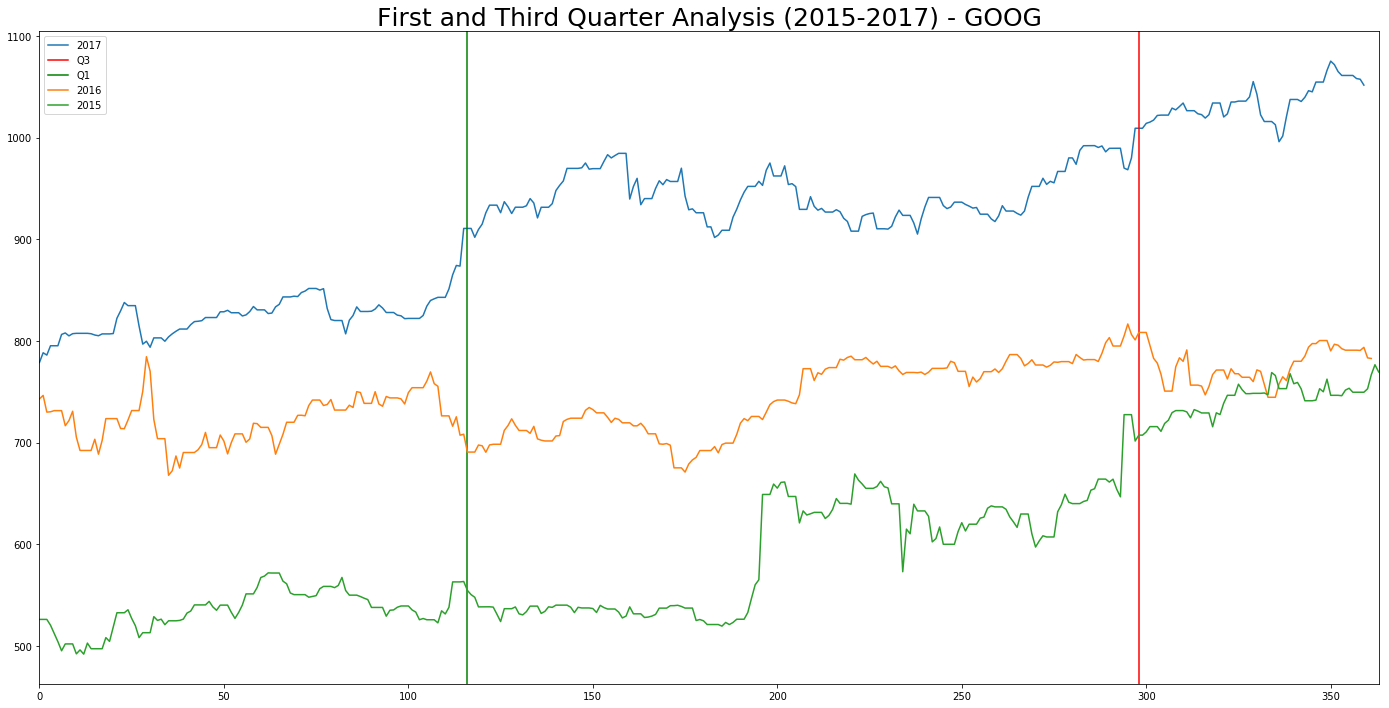

In [54]:
fig, ax = plt.subplots(figsize=(24,12))

Quarters2017['Open'].plot(ax=ax,label='2017')
plt.axvline(x=[298],color='red',label='Q3')
plt.axvline(x=[116],color='green',label='Q1')

Quarters2016['Open'].plot(ax=ax,label='2016')
Quarters2015['Open'].plot(ax=ax,label='2015')
plt.legend(loc='best')
plt.title('First and Third Quarter Analysis (2015-2017) - GOOG',fontsize=25)

### In what months does Google perform the best?

Creating a column Month and making abbreviating it.

In [55]:
Google = Google.reset_index()
Google['Month'] = pd.to_datetime(Google['Date'], format='%m/%d/%y').dt.month
Google['Month'] = Google['Month'].apply(lambda x: calendar.month_abbr[x])

Finding all unique month values

In [56]:
Google.Month.unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

Making a new dataframe for every month, getting the mean of growth in each month and then merging them into the one dataframe.

In [57]:
Jan = Google[Google.Month.str.contains("Jan") == True]
Feb = Google[Google.Month.str.contains("Feb") == True]
Mar = Google[Google.Month.str.contains("Mar") == True]
Apr = Google[Google.Month.str.contains("Apr") == True]
May = Google[Google.Month.str.contains("May") == True]
Jun = Google[Google.Month.str.contains("Jun") == True]
Jul = Google[Google.Month.str.contains("Jul") == True]
Aug = Google[Google.Month.str.contains("Aug") == True]
Sep = Google[Google.Month.str.contains("Sep") == True]
Oct = Google[Google.Month.str.contains("Oct") == True]
Nov = Google[Google.Month.str.contains("Nov") == True]
Dec = Google[Google.Month.str.contains("Dec") == True]

Jan = Jan['Growth'].mean()
Feb = Feb['Growth'].mean()
Mar = Mar['Growth'].mean()
Apr = Apr['Growth'].mean()
May = May['Growth'].mean()
Jun = Jun['Growth'].mean()
Jul = Jul['Growth'].mean()
Aug = Aug['Growth'].mean()
Sep = Sep['Growth'].mean()
Oct = Oct['Growth'].mean()
Nov = Nov['Growth'].mean()
Dec = Dec['Growth'].mean()

columns =  ['Mean_Growth_Per_Month']
Month = pd.DataFrame(columns=columns)
Month.loc[1] = [Jan]
Month.loc[2] = [Feb]
Month.loc[3] = [Mar]
Month.loc[4] = [Apr]
Month.loc[5] = [May]
Month.loc[6] = [Jun]
Month.loc[7] = [Jul]
Month.loc[8] = [Aug]
Month.loc[9] = [Sep]
Month.loc[10] = [Oct]
Month.loc[11] = [Nov]
Month.loc[12] = [Dec]

Resetting the index and reapplying month abrreviations

Then setting the month as an index and sorting the table in desceding value

In [58]:
Month = Month.reset_index()
Month['index'] = Month['index'].apply(lambda x: calendar.month_abbr[x])
Month = Month.set_index('index')
Month = Month.sort_values(['Mean_Growth_Per_Month'], ascending=False)

This graph shows Googles average best and worst performing months. October,July and May are their best performing months wheras June, August and March are their worst.

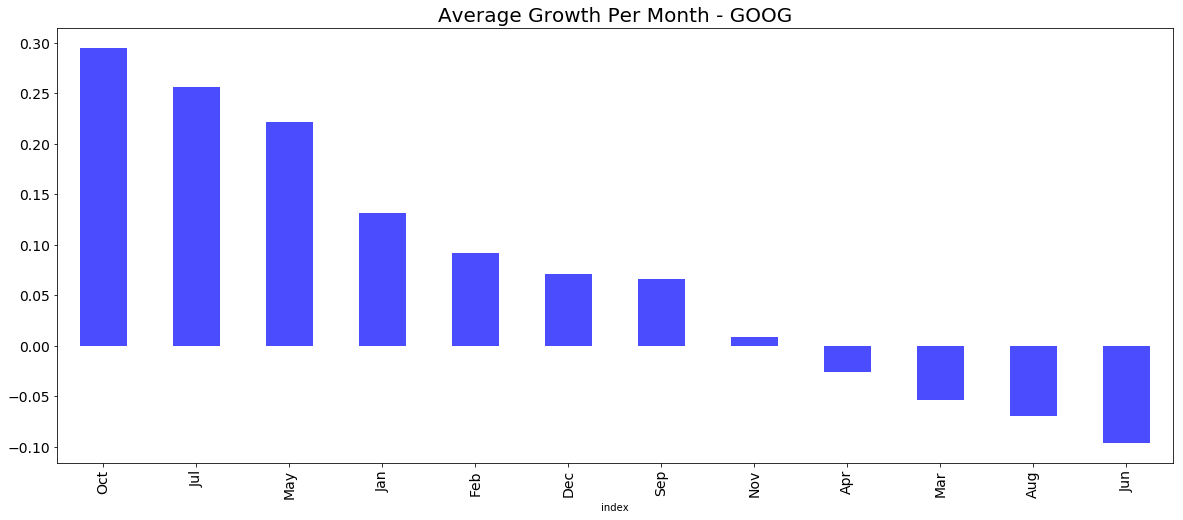

In [59]:
fig, ax = plt.subplots(figsize=(20,8))
Month.plot(ax=ax,subplots=True,fontsize=14,kind='bar',color = 'blue',alpha=0.7,legend=False)
plt.title('Average Growth Per Month - GOOG',fontsize=20)
plt.show()

## Moving Average

In [60]:
GoogleRolling = Google

This graphs shows the Rolling Average Of Google at both 15 day and 50 day intervals, this could be used to predict when it is a good time to invest in Google.

Text(0.5,1,'15day and 50d Moving Average (2013-2017) - GOOG')

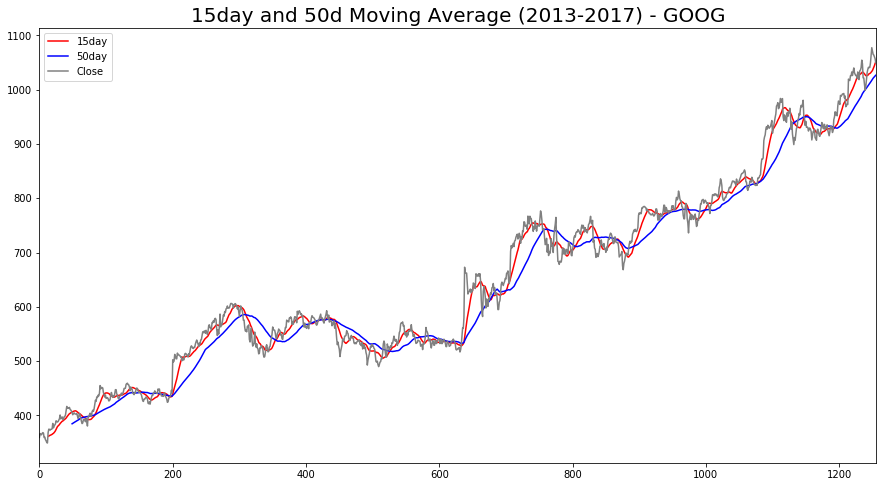

In [61]:
GoogleRolling["15day"] = np.round(GoogleRolling["Close"].rolling(window = 15, center = False).mean(), 2)
GoogleRolling["50day"] = np.round(GoogleRolling["Close"].rolling(window = 50, center = False).mean(), 2)
GoogleRolling.plot(y=['15day','50day','Close'],color =['red','blue','grey'],figsize=(15,8),lw=1.5)
plt.title('15day and 50d Moving Average (2013-2017) - GOOG',fontsize=20)

In [62]:
Google = Google.drop(['15day','50day'], axis=1)

## Volatility

Volatility the degree of variation of a trading price series over time as measured by the standard deviations.

After researching online on websites like 'http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:standard_deviation_volatility' 

I found you could calculate Volatility and use it to predict change.

In [63]:
GoogleVolatility = Google
GoogleVolatility = GoogleVolatility.drop(['Open','High','Low','Close','Growth','Range','Day','AdjustedClose','Month'], axis=1)
GoogleVolatility.columns = ['Date', 'Change']
GoogleVolatility['Volatility'] = GoogleVolatility.Change.rolling(10).std().shift()

This graph shows the Volatility of Google using a ten day rolling standard devisation.

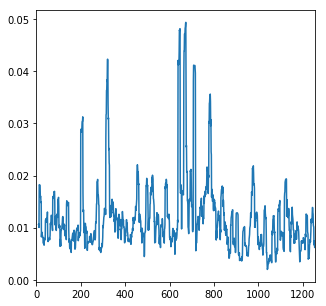

In [64]:
GoogleVolatility['Volatility'].plot(figsize=(5,5))

One way of predicting change would be to multiply Googles Volatility at any stage by its AdjustedClose the next day.


In [65]:
GoogleVolatility['Expected Change'] = GoogleVolatility['Volatility'] * Google['AdjustedClose'].shift()

To calculate the actually change you just minus the adjusted close from each day by eachother.

In [66]:
GoogleVolatility['Actual Change'] = Google['AdjustedClose'] - Google['AdjustedClose'].shift()

Graphing the expected against the actual will show an accurate enough prediction but can be subject to lag meaning its predictions could be late as it uses a 10 day rolling average

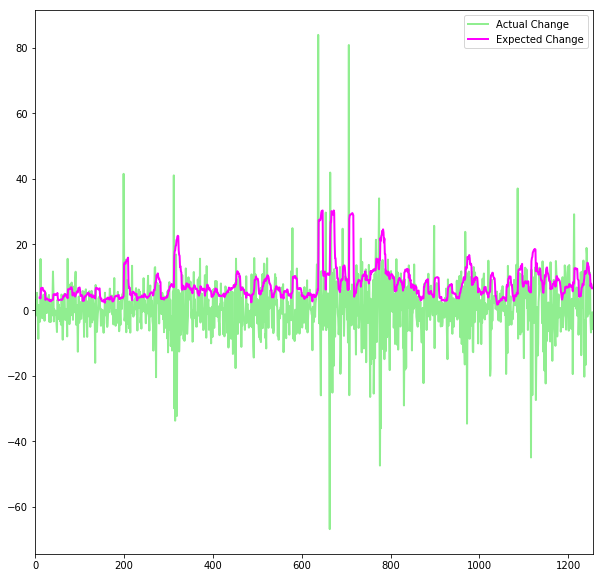

In [67]:
fig, ax = plt.subplots(figsize=(15,8))
GoogleVolatility.plot(ax=ax,y=['Actual Change','Expected Change'],color =['lightgreen','magenta'],figsize=(10,10),lw=2)

## Extra Work - NASDAQ Comparision

I had a bit of extra time with this assignments extention so I was interested to compare how GOOG performed against NASDAQ (American Stock Exchange Market)

I researched to see if I could find any information on the market between the years of 2013 and 2017. While searching I came across 'investing.com'.This site allowed me to download a CSV file of the NASDAQ from 2013-2017 which I have included in my submission.

In [68]:
Google2 = Google

Reading in the data and getting a first look at what I have.

In [69]:
Nasdaq = pd.read_csv("NASDAQ Composite Historical Data.csv")
Nasdaq.head(7)

,Date,Price,Open,High,Low,Vol.,Change %
0,"Dec 29, 2017","6,903.39","6,952.60","6,954.98","6,903.39",422.84M,-0.67
1,"Dec 28, 2017","6,950.16","6,953.38","6,954.80","6,936.75",293.06M,0.16
2,"Dec 27, 2017","6,939.34","6,941.45","6,955.38","6,931.34",316.13M,0.04
3,"Dec 26, 2017","6,936.25","6,928.92","6,942.14","6,915.56",322.15M,-0.34
4,"Dec 22, 2017","6,959.96","6,958.02","6,962.26","6,944.44",372.94M,-0.08
5,"Dec 21, 2017","6,965.36","6,972.88","6,992.63","6,961.20",436.63M,0.06
6,"Dec 20, 2017","6,960.96","6,991.26","6,991.26","6,935.42",442.66M,-0.04


Changing the files dates to datetime then converting it to an object.

In [70]:
Nasdaq['Dates'] = pd.to_datetime(Nasdaq['Date'])
Nasdaq['Dates'] = Nasdaq['Dates'].astype(object)
Nasdaq.head(7)

,Date,Price,Open,High,Low,Vol.,Change %,Dates
0,"Dec 29, 2017","6,903.39","6,952.60","6,954.98","6,903.39",422.84M,-0.67,2017-12-29 00:00:00
1,"Dec 28, 2017","6,950.16","6,953.38","6,954.80","6,936.75",293.06M,0.16,2017-12-28 00:00:00
2,"Dec 27, 2017","6,939.34","6,941.45","6,955.38","6,931.34",316.13M,0.04,2017-12-27 00:00:00
3,"Dec 26, 2017","6,936.25","6,928.92","6,942.14","6,915.56",322.15M,-0.34,2017-12-26 00:00:00
4,"Dec 22, 2017","6,959.96","6,958.02","6,962.26","6,944.44",372.94M,-0.08,2017-12-22 00:00:00
5,"Dec 21, 2017","6,965.36","6,972.88","6,992.63","6,961.20",436.63M,0.06,2017-12-21 00:00:00
6,"Dec 20, 2017","6,960.96","6,991.26","6,991.26","6,935.42",442.66M,-0.04,2017-12-20 00:00:00


Dropping all irrelevant columns from Nasdaq

In [71]:
Nasdaq = Nasdaq.drop(['Vol.','Price','High','Low','Change %','Date'], axis=1)

Making the column Dates an object

In [72]:
Google2 = Google2.reset_index()
Google2['Dates'] = Google2['Date']
Google2['Dates'] = Google2['Dates'].astype(object)

Dropping all irrelevant columns from Google

In [73]:
Google2 = Google2.drop(['Date','High','Low','Close','AdjustedClose','Growth','Range','Day','Month','Return Change','index'], axis=1)

Checking both Nasdaq and Google are in the same format

In [74]:
Google2.head(5)

,Open,Dates
0,360.122742,2013-01-03 00:00:00
1,362.313507,2013-01-04 00:00:00
2,365.348755,2013-01-07 00:00:00
3,365.393463,2013-01-08 00:00:00
4,363.769043,2013-01-09 00:00:00


In [75]:
Nasdaq.head(5)

,Open,Dates
0,"6,952.60",2017-12-29 00:00:00
1,"6,953.38",2017-12-28 00:00:00
2,"6,941.45",2017-12-27 00:00:00
3,"6,928.92",2017-12-26 00:00:00
4,"6,958.02",2017-12-22 00:00:00


Merging Google and Nasdaq on the common column Dates

In [76]:
Common = pd.merge(Google2, Nasdaq, on=['Dates'])
Common.columns = ['Open-Google','Date','Open-NASDAQ']

Setting Date as the index and changing it back to a datetime.

In [77]:
Common.set_index('Date')
Common['Date'] = pd.to_datetime(Common['Date'])

In [78]:
Common.head(5)

,Open-Google,Date,Open-NASDAQ
0,360.122742,2013-01-03,"3,108.49"
1,362.313507,2013-01-04,"3,100.88"
2,365.348755,2013-01-07,"3,089.17"
3,365.393463,2013-01-08,"3,098.46"
4,363.769043,2013-01-09,"3,099.65"


I noticed Open-NASDAQ contained commas when in thousands so I just removed them completely.

In [79]:
Common['Open-NASDAQ'] = Common['Open-NASDAQ'].str.replace(',','').astype(np.float64)

In [80]:
Common.set_index('Date',drop=True,inplace=True)
Common.head(5)

,Open-Google,Open-NASDAQ
Date,,
2013-01-03,360.122742,3108.49
2013-01-04,362.313507,3100.88
2013-01-07,365.348755,3089.17
2013-01-08,365.393463,3098.46
2013-01-09,363.769043,3099.65


#### Plotting NASDAQ against GOOG using two different Y axis to make them comparitable

Red = Google

Green = NASDAQ

Text(0.5,1,'NASDAQ vs Google (2013-2017)')

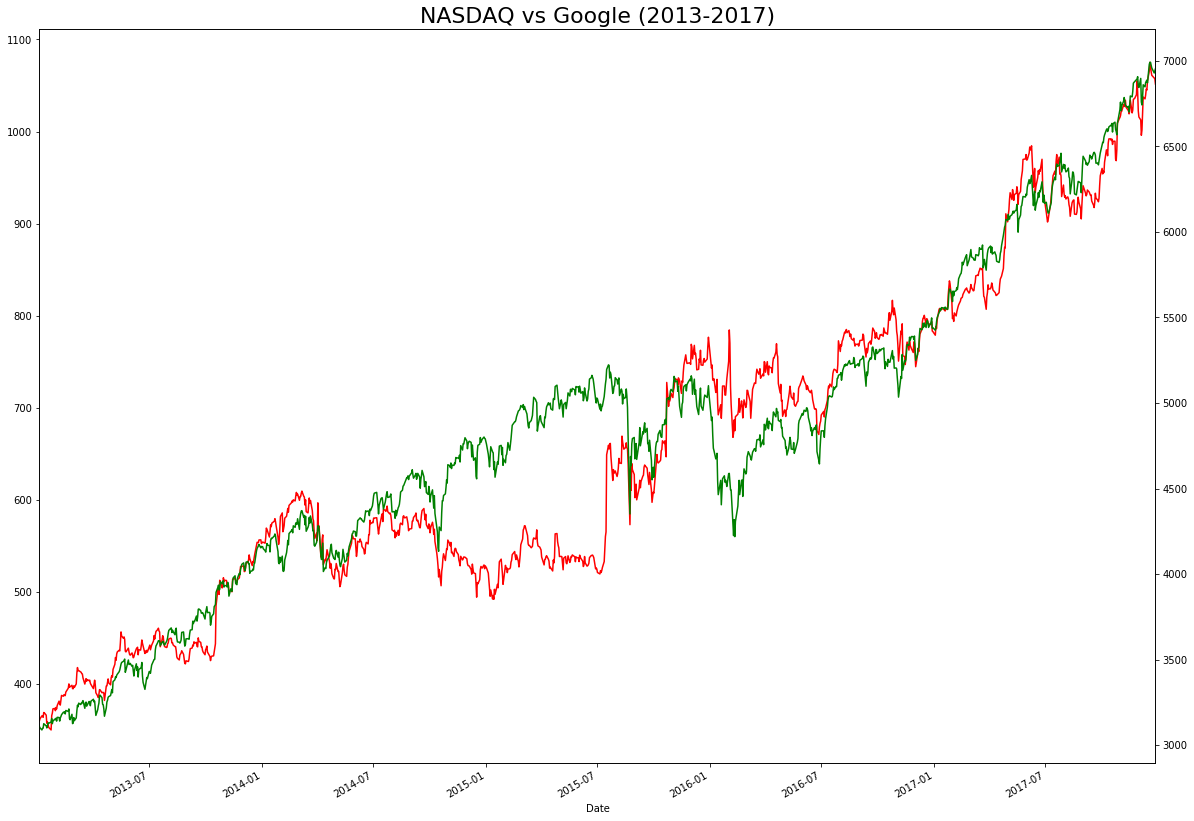

In [81]:
fig, ax = plt.subplots(figsize=(20,15))
ax3 = ax.twinx()
ax.plot()
Common['Open-Google'].plot(ax=ax,color='red')
Common['Open-NASDAQ'].plot(ax=ax3,color='green')
plt.title('NASDAQ vs Google (2013-2017)',fontsize=22)

When comparing Google against Nasdaq in the graph above many similaritys can be drawn. Over time they have both followed a similar growth rate between 2013 and 2017 finishing at very similar positions.

A drop in Googles rate can be seen at the beggining of 2015 which I will address in my final graph below.

Otherwise it seems they both follow the same market trends, which is expected as NASDAQ is the entire American Market

(735385.0, 736116.0)

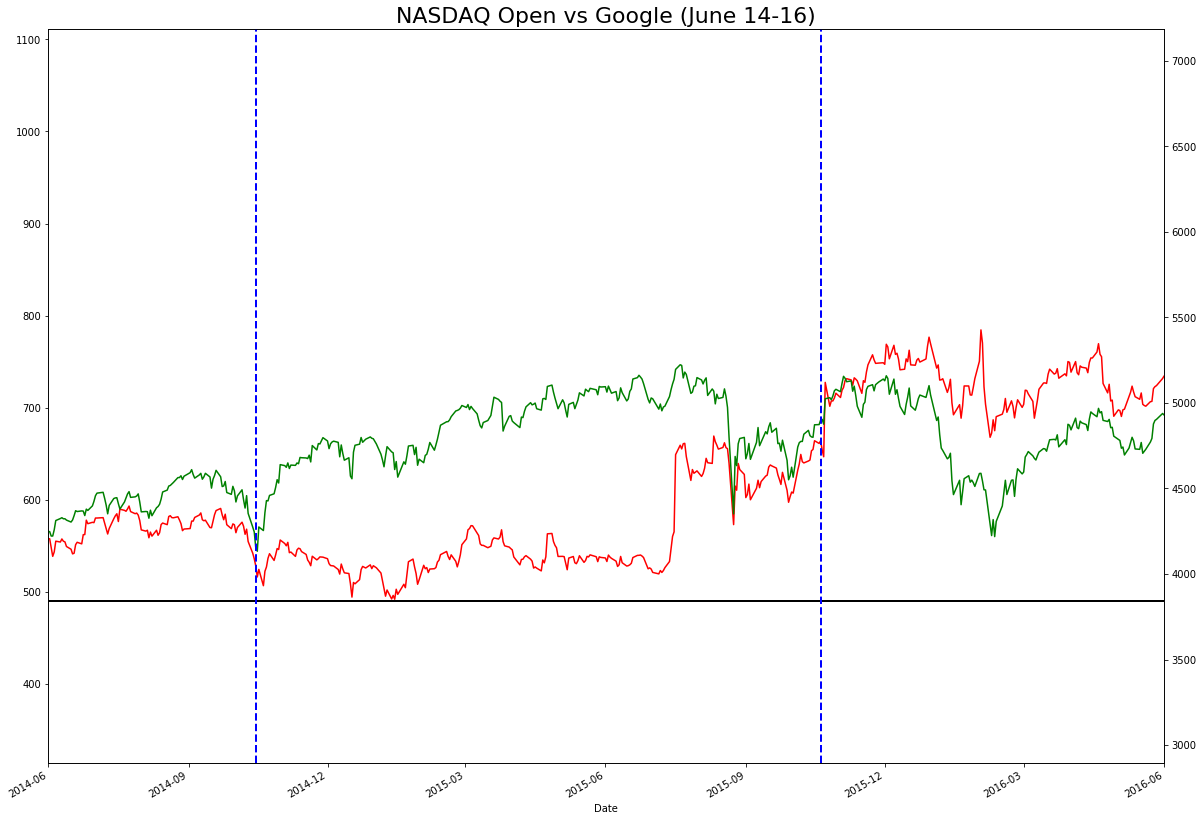

In [82]:
fig, ax = plt.subplots(figsize=(20,15))
ax3 = ax.twinx()
ax.plot()
Common['Open-Google'].plot(ax=ax,color='red').axhline(y = 490, color = "black", lw = 2)
Common['Open-NASDAQ'].plot(ax=ax3,color='green')
plt.title('NASDAQ Open vs Google (June 14-16)',fontsize=22)
plt.axvline(x = ('2014-10-15'), color = "blue", lw = 2, linestyle='--')
plt.axvline(x = ('2015-10-20'), color = "blue", lw = 2, linestyle='--')
ax.set_xlim('2014-06','2016-6')

In this final graph a lot of analysis can be given:

Its very clear that mid October 2014 Google could not keep up with NASDAQ's growth. Although it should be noted Google's stock price does not actually drop very much over this period not going below where it began to loose track (Black Line).

Google then make up the ground back on NASDAQ and eventually surpass them just over a year later. When analysing this stock if you were looking to invest inbetween the period of the blue lines would have been a very profitable time because Google held its value showing its market strength.

### Possible Further Analysis

The original dataset provided only contained four columns so this gave very little to analyse. Although it was possible to create new columns like I did if new ones like Volume and Earnings where available a more in-depth analysis could have taken place. 

Another possible further analysis would be to compare stocks of different companys in similar markets like Apple and Google or Ford and Tesla. This would bring you into a whole new depth of analysis.

A final further analysis that you could do is try to predict hows stocks will rise or fall. After completing this assignment which I really enjoyed I am considering doing it for my final project.